In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [24]:
dataset=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [25]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          239 non-null    int64  
 1   month        239 non-null    int64  
 2   year         239 non-null    int64  
 3   Temperature  239 non-null    int64  
 4   RH           239 non-null    int64  
 5   Ws           239 non-null    int64  
 6   Rain         239 non-null    float64
 7   FFMC         239 non-null    float64
 8   DMC          239 non-null    float64
 9   DC           239 non-null    float64
 10  ISI          239 non-null    float64
 11  BUI          239 non-null    float64
 12  FWI          239 non-null    float64
 13  Classes      239 non-null    object 
 14  Region       239 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.1+ KB


Data Cleaning

In [27]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [28]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          239 non-null    int64  
 1   month        239 non-null    int64  
 2   year         239 non-null    int64  
 3   Temperature  239 non-null    int64  
 4   RH           239 non-null    int64  
 5   Ws           239 non-null    int64  
 6   Rain         239 non-null    float64
 7   FFMC         239 non-null    float64
 8   DMC          239 non-null    float64
 9   DC           239 non-null    float64
 10  ISI          239 non-null    float64
 11  BUI          239 non-null    float64
 12  FWI          239 non-null    float64
 13  Classes      239 non-null    object 
 14  Region       239 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.1+ KB


In [30]:
df[["Region"]]=df[['Region']].astype(int)

In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [33]:
##Removing the null values
df=df.dropna().reset_index(drop=True)

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [36]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1


In [37]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [38]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1


In [39]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          238 non-null    int64  
 1   month        238 non-null    int64  
 2   year         238 non-null    int64  
 3   Temperature  238 non-null    int64  
 4   RH           238 non-null    int64  
 5   Ws           238 non-null    int64  
 6   Rain         238 non-null    float64
 7   FFMC         238 non-null    float64
 8   DMC          238 non-null    float64
 9   DC           238 non-null    float64
 10  ISI          238 non-null    float64
 11  BUI          238 non-null    float64
 12  FWI          238 non-null    float64
 13  Classes      238 non-null    object 
 14  Region       238 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.0+ KB


Changes the required columns as integer data type

In [42]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [43]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          238 non-null    int64  
 1   month        238 non-null    int64  
 2   year         238 non-null    int64  
 3   Temperature  238 non-null    int64  
 4   RH           238 non-null    int64  
 5   Ws           238 non-null    int64  
 6   Rain         238 non-null    float64
 7   FFMC         238 non-null    float64
 8   DMC          238 non-null    float64
 9   DC           238 non-null    float64
 10  ISI          238 non-null    float64
 11  BUI          238 non-null    float64
 12  FWI          238 non-null    float64
 13  Classes      238 non-null    object 
 14  Region       238 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.0+ KB


Changing the other columns to float data datatype

In [45]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [46]:
objects

['Classes']

In [47]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          238 non-null    int64  
 1   month        238 non-null    int64  
 2   year         238 non-null    int64  
 3   Temperature  238 non-null    int64  
 4   RH           238 non-null    int64  
 5   Ws           238 non-null    int64  
 6   Rain         238 non-null    float64
 7   FFMC         238 non-null    float64
 8   DMC          238 non-null    float64
 9   DC           238 non-null    float64
 10  ISI          238 non-null    float64
 11  BUI          238 non-null    float64
 12  FWI          238 non-null    float64
 13  Classes      238 non-null    object 
 14  Region       238 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.0+ KB


In [49]:
objects

['Classes']

In [50]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,238.000000,238.000000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,16.029412,7.533613,2012.0,32.184874,61.882353,15.537815,0.750000,78.141597,14.910924,50.231513,4.818908,16.955462,7.173109,0.487395
std,8.734430,1.104710,0.0,3.654871,14.907975,2.821825,2.010683,14.236795,12.417259,47.835849,4.162209,14.256124,7.456622,0.500894
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,9.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.625000,6.000000,14.700000,1.425000,6.200000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.750000,11.450000,34.300000,3.750000,12.550000,4.900000,0.000000
75%,23.750000,8.750000,2012.0,35.000000,73.750000,17.000000,0.475000,88.300000,20.900000,71.225000,7.300000,22.900000,11.825000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [51]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
## Let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset.csv',index=False)

# Exploratory Data Analysis

In [53]:
##drop day,month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [54]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [55]:
##categories in classes
df_copy['Classes'].value_counts()

Classes
fire             131
not fire          96
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [56]:
##Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [57]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [58]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
233,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
234,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
235,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
236,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
237,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [59]:
df_copy['Classes'].value_counts()

Classes
1    137
0    101
Name: count, dtype: int64

In [61]:
## Percentage for pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

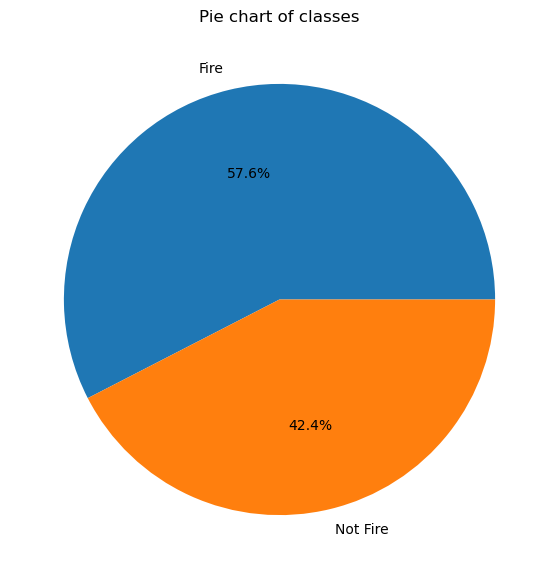

In [62]:
#plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of classes")
plt.show()

## Correlation

In [63]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.650011,-0.293201,-0.324403,0.679710,0.482919,0.372513,0.602572,0.456740,0.564996,0.514362,0.282464
RH,-0.650011,1.000000,0.255672,0.216930,-0.641088,-0.403289,-0.220149,-0.684901,-0.347961,-0.578701,-0.427945,-0.420031
Ws,-0.293201,0.255672,1.000000,0.179670,-0.188960,-0.015257,0.067180,-0.005863,0.017390,0.018638,-0.089606,-0.168326
Rain,-0.324403,0.216930,0.179670,1.000000,-0.541766,-0.286090,-0.295849,-0.345112,-0.297408,-0.322952,-0.379416,-0.047341
FFMC,0.679710,-0.641088,-0.188960,-0.541766,1.000000,0.598780,0.501616,0.738019,0.587043,0.689894,0.770063,0.250388
DMC,0.482919,-0.403289,-0.015257,-0.286090,0.598780,1.000000,0.874097,0.675033,0.981946,0.873827,0.577192,0.214868
DC,0.372513,-0.220149,0.067180,-0.295849,0.501616,0.874097,1.000000,0.501194,0.941179,0.735633,0.502247,-0.062929
ISI,0.602572,-0.684901,-0.005863,-0.345112,0.738019,0.675033,0.501194,1.000000,0.638060,0.921766,0.730308,0.287200
BUI,0.456740,-0.347961,0.017390,-0.297408,0.587043,0.981946,0.941179,0.638060,1.000000,0.855616,0.578154,0.110240
FWI,0.564996,-0.578701,0.018638,-0.322952,0.689894,0.873827,0.735633,0.921766,0.855616,1.000000,0.713693,0.219862


In [64]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Plot the heatmap with the numeric DataFrame
sns.heatmap(numeric_df.corr(), annot=True)


<Axes: >

In [65]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

<Axes: ylabel='FWI'>

In [66]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [67]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [68]:
df['Classes']=np.where(df["Classes"].str.contains('not fire'),'not fire','fire')

In [69]:
##Monthly Fire Analysis

dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel regions')

In [70]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fires Analysis of Brjaia Regions",weight='bold')

Text(0.5, 1.0, 'Fires Analysis of Brjaia Regions')

In [71]:
df['Classes'].value_counts()

Classes
fire        137
not fire    101
Name: count, dtype: int64

In [72]:
# Convert the column to float, setting non-numeric values as NaN
df['Classes'] = pd.to_numeric(df['Classes'], errors='coerce')




In [73]:
df['Classes'].fillna(0, inplace=True)


/tmp/ipykernel_4825/2456754047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Classes'].fillna(0, inplace=True)


In [53]:
##Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [54]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.0,0


In [55]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
235    6.5
236    0.0
237    0.2
238    0.7
239    0.5
Name: FWI, Length: 240, dtype: float64

In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [57]:
X_train.shape,X_test.shape

((180, 14), (60, 14))

In [58]:

## Feature Selection based on correlation
X_train_numeric = X_train.select_dtypes(include=[float, int])


In [59]:
correlation_matrix = X_train_numeric.corr()


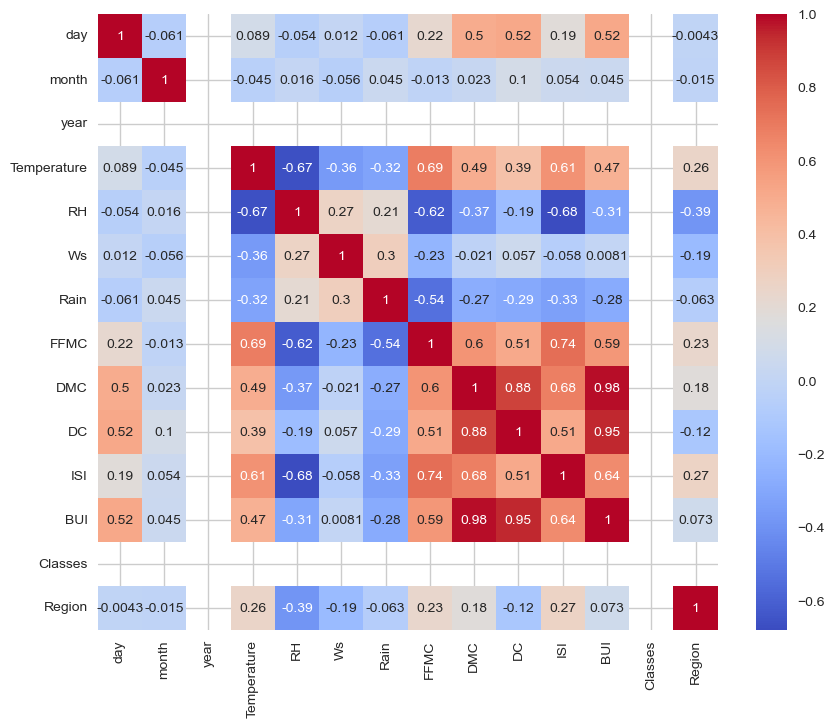

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

## threshold -- Domain expertise
corr_features=correlation(X_train,0.85)

In [61]:
def correlation(dataset, threshold):
    # Select only numeric columns for correlation analysis
    numeric_data = dataset.select_dtypes(include=[float, int])
    col_corr = set()  # Set to hold the correlated column names
    corr_matrix = numeric_data.corr()  # Calculate the correlation matrix
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation exceeds the threshold
                colname = corr_matrix.columns[i]  # Get the name of the correlated column
                col_corr.add(colname)
                
    return col_corr


In [62]:
corr_features = correlation(X_train, 0.85)


In [63]:
corr_features

{'BUI', 'DC'}

In [64]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((180, 12), (60, 12))

# Feature Scaling Or Standarization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [66]:
X_train_scaled

array([[-1.3156776 ,  1.36614767,  0.        , ..., -0.79872371,
         0.        , -0.9459053 ],
       [-0.86264658, -1.36614767,  0.        , ..., -0.77451181,
         0.        ,  1.05718828],
       [ 1.5157663 ,  1.36614767,  0.        , ..., -1.06505462,
         0.        , -0.9459053 ],
       ...,
       [-1.65545087,  1.36614767,  0.        , ..., -1.08926652,
         0.        , -0.9459053 ],
       [-1.65545087,  0.45538256,  0.        , ..., -0.6534523 ,
         0.        ,  1.05718828],
       [-0.52287331,  1.36614767,  0.        , ..., -0.87135941,
         0.        , -0.9459053 ]])

##Box Plots To understand Effect Of Standard Scaler

C:\Users\utkar\AppData\Local\Temp\ipykernel_5752\1905275063.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling ')

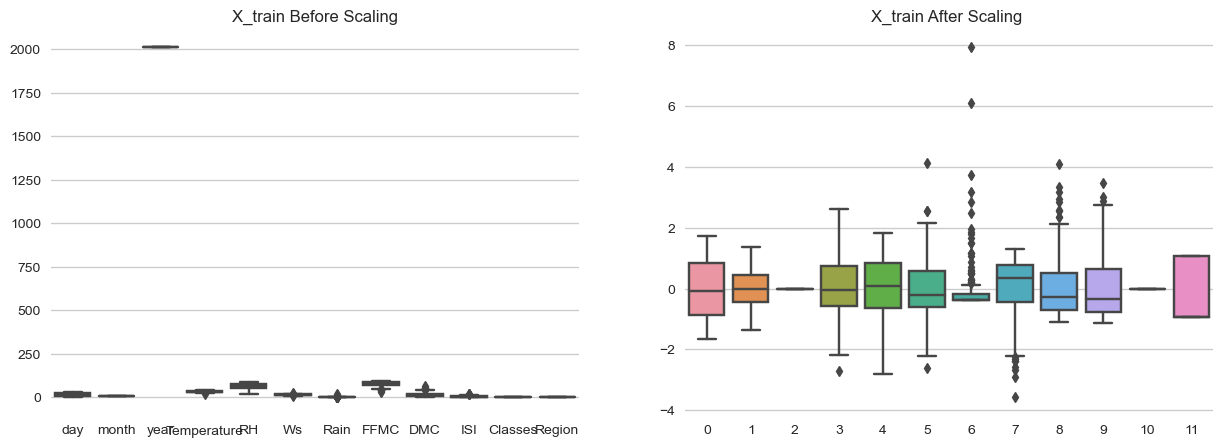

In [67]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling ')

#Linear Regression Model

Mean ansolute error 0.7563242917713742
R2 Score  0.977946086887216


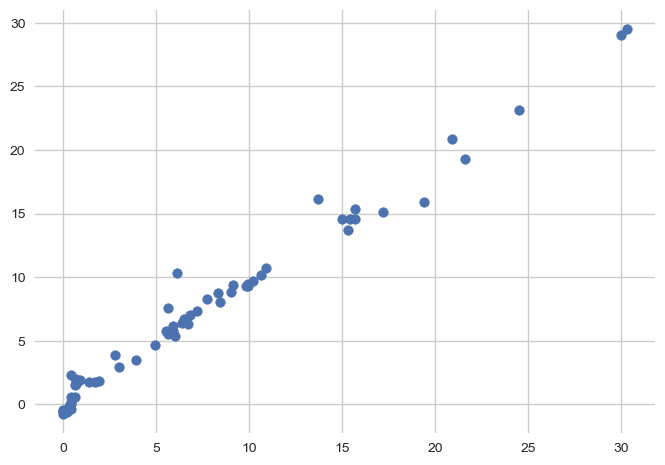

In [68]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean ansolute error", mae)
print("R2 Score ", score)
plt.scatter(y_test,y_pred)

# Lasso Regression

Mean absolute error 1.3370309389482131
R2 Score 0.9410175315199927


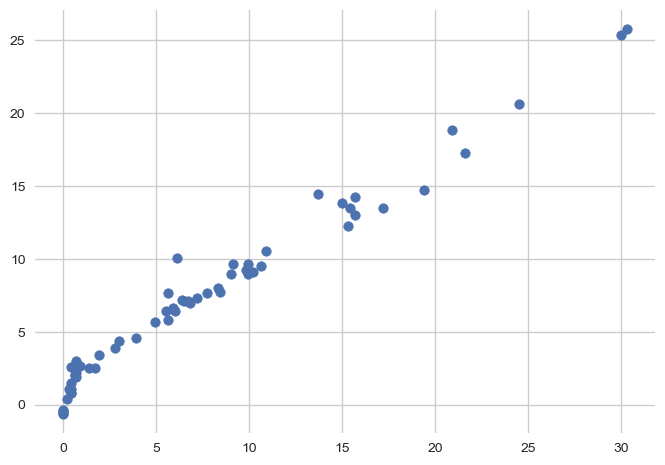

In [69]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

# Cross Validation Lasso

In [70]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [71]:
lassocv.alpha_

0.15611353666680106

In [72]:
lassocv.alphas_

array([6.75778233, 6.30233042, 5.87757444, 5.4814456 , 5.11201451,
       4.76748184, 4.44616952, 4.14651257, 3.86705151, 3.60642518,
       3.36336419, 3.1366847 , 2.92528265, 2.72812839, 2.54426167,
       2.37278695, 2.21286905, 2.06372908, 1.92464065, 1.79492631,
       1.67395428, 1.56113537, 1.45592007, 1.35779593, 1.26628503,
       1.18094165, 1.10135014, 1.02712283, 0.95789819, 0.89333905,
       0.83313099, 0.77698075, 0.72461485, 0.67577823, 0.63023304,
       0.58775744, 0.54814456, 0.51120145, 0.47674818, 0.44461695,
       0.41465126, 0.38670515, 0.36064252, 0.33633642, 0.31366847,
       0.29252826, 0.27281284, 0.25442617, 0.23727869, 0.2212869 ,
       0.20637291, 0.19246406, 0.17949263, 0.16739543, 0.15611354,
       0.14559201, 0.13577959, 0.1266285 , 0.11809417, 0.11013501,
       0.10271228, 0.09578982, 0.08933391, 0.0833131 , 0.07769808,
       0.07246148, 0.06757782, 0.0630233 , 0.05877574, 0.05481446,
       0.05112015, 0.04767482, 0.0444617 , 0.04146513, 0.03867

In [73]:
lassocv.mse_path_

array([[33.46861693, 48.82392695, 41.0807152 , 77.96590712, 66.48883681],
       [29.54772299, 43.03392442, 35.55368354, 77.96590712, 63.47632789],
       [26.11768716, 37.96998286, 30.47008261, 70.83749311, 57.09763657],
       [23.11599121, 33.5394703 , 26.13823944, 64.36212261, 51.50939597],
       [20.4879606 , 29.66155587, 22.45421038, 58.65469938, 46.61137057],
       [18.18624694, 26.26602413, 19.32795182, 53.62028434, 41.23860623],
       [16.16934993, 23.2915215 , 16.68160791, 47.3360869 , 35.90120204],
       [14.40118174, 20.68464016, 14.44774981, 41.73765685, 31.26667884],
       [12.85028702, 18.3987618 , 12.56801471, 36.84754618, 27.2426272 ],
       [11.48915097, 16.39346278, 10.99213931, 32.57494856, 23.75009442],
       [10.29406156, 14.63328688,  9.67651614, 28.84074174, 20.71885857],
       [ 9.24406304, 13.08738955,  8.58354072, 25.57549421, 18.08840421],
       [ 8.32096953, 11.72887079,  7.68062227, 22.72031883, 15.80612746],
       [ 7.50891596, 10.5342663 ,  6.9

Mean absolute error 0.9277950247713235
R2 Score 0.9711739862969399


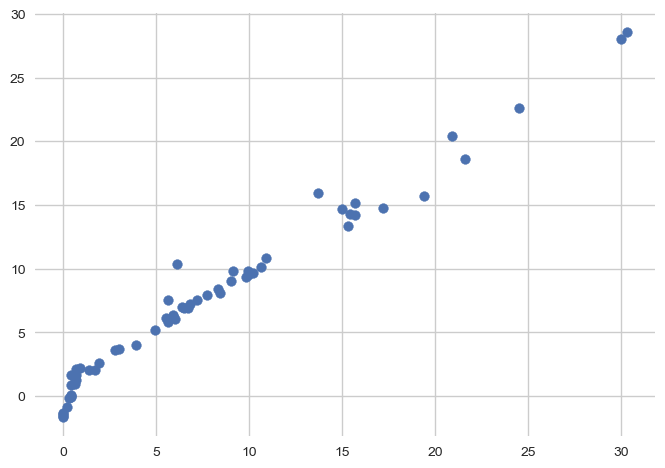

In [74]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score", score)

# Ridge Regression model

Mean absolute error 0.7761672748128294
R2 score 0.9772552201244933


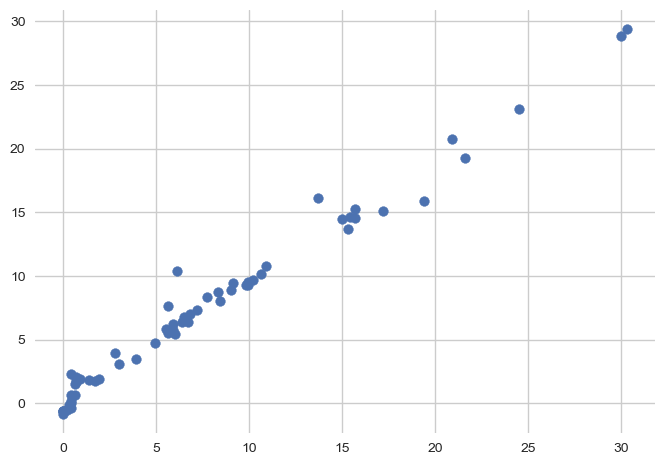

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.9536408564365161
R2 Score 0.9693836372037227


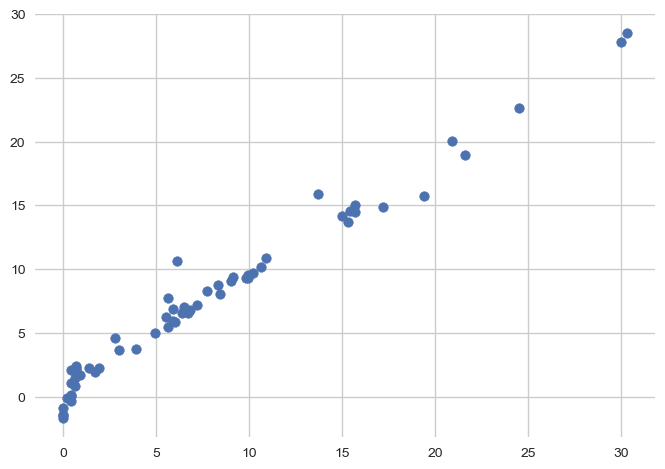

In [77]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)

In [78]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# Elasticnet Regression

Mean absolute error 2.0673712680053073
R2 Score 0.8665373062113585


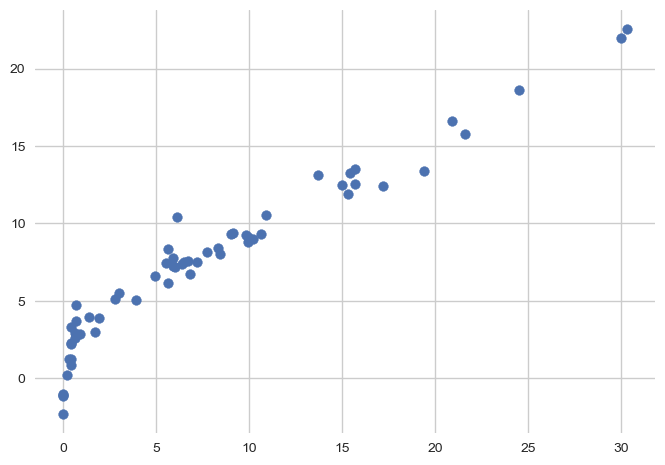

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

NameError: name 'y_Pred' is not defined

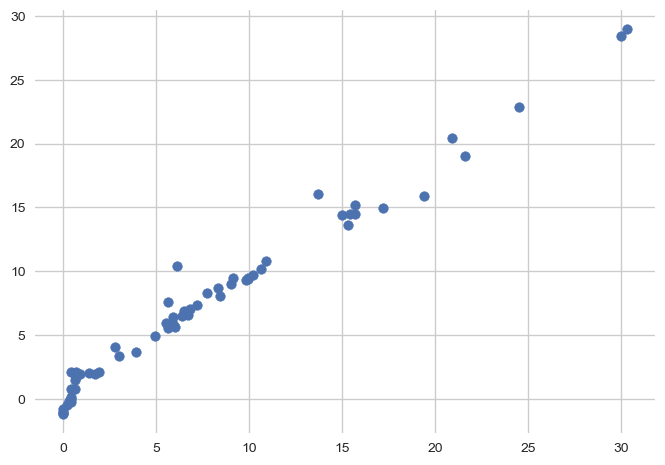

In [80]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_Pred)
print("Mean ansolute error", mae)
print("R2 Score",score)

 Pickle the machine learning models, preprocessing model standardscaler

In [82]:
scaler

StandardScaler()

In [83]:
ridge

Ridge()

In [84]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))